In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
#https://archive.ics.uci.edu/dataset/10/automobile

In [69]:
X_raw=pd.read_csv("data1.csv",
                  header=None,
                  na_values=["?"])
X_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [70]:
y=X_raw[25]
X_raw=X_raw.drop(25,axis=1)

### Заполнение пропусков
- заполинить средними (mean,median)
- предсказывать пропущенные значения по непропущенным

In [71]:
#X_raw.isnull().sum()
X_raw.isnull().sum()[X_raw.isnull().sum() > 0]
#процент пропусков по каждому столбцу
#(X_raw.isnull().mean() * 100)[X_raw.isnull().mean() > 0]


1     37
5      2
18     4
19     4
21     2
22     2
dtype: int64

In [72]:
X_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       201 non-null    int64  
 1   1       164 non-null    float64
 2   2       201 non-null    object 
 3   3       201 non-null    object 
 4   4       201 non-null    object 
 5   5       199 non-null    object 
 6   6       201 non-null    object 
 7   7       201 non-null    object 
 8   8       201 non-null    object 
 9   9       201 non-null    float64
 10  10      201 non-null    float64
 11  11      201 non-null    float64
 12  12      201 non-null    float64
 13  13      201 non-null    int64  
 14  14      201 non-null    object 
 15  15      201 non-null    object 
 16  16      201 non-null    int64  
 17  17      201 non-null    object 
 18  18      197 non-null    float64
 19  19      197 non-null    float64
 20  20      201 non-null    float64
 21  21      199 non-null    float64
 22  22

In [27]:
X_raw2=X_raw.fillna({1:X_raw[1].mean()})

In [33]:
X_raw2 = X_raw.fillna(X_raw.select_dtypes('number').mean())


In [73]:
from sklearn.impute import SimpleImputer

In [74]:
cat_features_mask = (X_raw.dtypes=="object").values

x_real= X_raw[X_raw.columns[~cat_features_mask]]

mis_replacer = SimpleImputer(strategy="mean")
X_no_mis_real = pd.DataFrame(data=mis_replacer.fit_transform(x_real),columns=x_real.columns)

# для категориалных 
X_cat = X_raw[X_raw.columns[cat_features_mask]].fillna("")
X_no_mis= pd.concat([X_no_mis_real,X_cat],axis=1)


In [75]:
X_no_mis.head()

,0,1,9,10,11,12,13,16,18,19,...,2,3,4,5,6,7,8,14,15,17
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [76]:
X_no_mis.isnull().sum()


0     0
1     0
9     0
10    0
11    0
12    0
13    0
16    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
14    0
15    0
17    0
dtype: int64

### Преобразование нечисловых признаков

In [77]:
import pandas as pd

df = pd.DataFrame({
    'Цвет': ['красный', 'синий', 'зелёный', 'красный']
})

dummies_no_drop = pd.get_dummies(df, drop_first=False)
print(dummies_no_drop)

   Цвет_зелёный  Цвет_красный  Цвет_синий
0         False          True       False
1         False         False        True
2          True         False       False
3         False          True       False


In [78]:
X_dum= pd.get_dummies(X_no_mis,drop_first=True)
X_dum

,0,1,9,10,11,12,13,16,18,19,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,False,False,False,False,False,False,False,True,False,False
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1.0,95.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False
197,-1.0,95.0,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False
198,-1.0,95.0,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,...,False,False,False,False,False,False,False,True,False,False
199,-1.0,95.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,...,False,False,False,False,False,True,False,False,False,False


In [79]:
X_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 65 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   0                201 non-null    float64
 1   1                201 non-null    float64
 2   9                201 non-null    float64
 3   10               201 non-null    float64
 4   11               201 non-null    float64
 5   12               201 non-null    float64
 6   13               201 non-null    float64
 7   16               201 non-null    float64
 8   18               201 non-null    float64
 9   19               201 non-null    float64
 10  20               201 non-null    float64
 11  21               201 non-null    float64
 12  22               201 non-null    float64
 13  23               201 non-null    float64
 14  24               201 non-null    float64
 15  2_audi           201 non-null    bool   
 16  2_bmw            201 non-null    bool   
 17  2_chevrolet     

### Масштабирование признаков

In [80]:
from sklearn import preprocessing

X_dum.columns = X_dum.columns.astype(str)
normalizer = preprocessing.MinMaxScaler()

X_real_norm = normalizer.fit_transform(X_dum)
X=pd.DataFrame(data=X_real_norm)
X.head()


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.6,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.8,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.8,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn_reg = KNeighborsRegressor(n_neighbors=5)  
knn_reg.fit(X_train, y_train)

y_pred = knn_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.4f}")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")

MAE:  3123.9639
MSE:  30147207.0511
RMSE: 5490.6472
R²:   0.6820


In [82]:
from sklearn.model_selection import GridSearchCV, KFold

In [83]:
# ---- сетка гиперпараметров ----
param_grid = {
    "n_neighbors": [3,5,7,9,11,13,15,17,21,25,31,41,51,61,71],
    "weights": ["uniform", "distance"],
    "metric": ["minkowski"],   # с p=1 (манхэттен) или p=2 (евклид)
    "p": [1, 2],
    "algorithm": ["auto", "kd_tree", "ball_tree"],
    "leaf_size": [15, 30, 45]
}

# 5-fold CV (перемешивание уже было в train_test_split; тут можно без shuffle)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

knn_base = KNeighborsRegressor()

# несколько метрик; ориентируемся на MAE
grid = GridSearchCV(
    estimator=knn_base,
    param_grid=param_grid,
    scoring={
        "mae": "neg_mean_absolute_error",
        "mse": "neg_mean_squared_error",
        "r2": "r2"
    },
    refit="mae",   
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("Лучшие параметры:", grid.best_params_)
print("Лучший CV MAE:", -grid.best_score_)

# ---- оценка на тесте лучшей моделью ----
best_knn = grid.best_estimator_
y_pred_gs = best_knn.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_gs)
mse = mean_squared_error(y_test, y_pred_gs)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_gs)

print("\n=== ТЕСТ ===")
print(f"MAE:  {mae:.4f}")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Лучшие параметры: {'algorithm': 'auto', 'leaf_size': 15, 'metric': 'minkowski', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Лучший CV MAE: 2093.8467742879893

=== ТЕСТ ===
MAE:  2265.1984
MSE:  13226363.5440
RMSE: 3636.8068
R²:   0.8605


### Визуализация данных

In [103]:
Data = pd.read_csv("titanic.csv",sep=",")

In [90]:
Data.shape

(891, 12)

In [91]:
Data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Выведите основные числовые характеристики числовых столбцов.

In [92]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [93]:
Data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [94]:
Data.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [104]:
Data.Sex=Data.Sex.map({'male':0,'female':1})

Как влияет пол на выживаемость

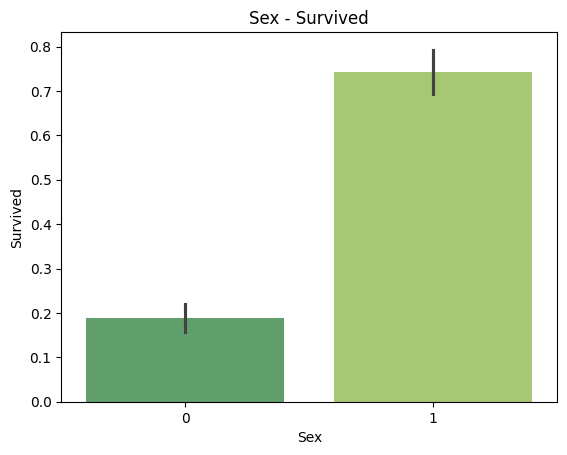

In [105]:
sns.barplot(x='Sex',y='Survived',data=Data,palette='summer', legend=False, hue='Sex')
plt.title('Sex - Survived')
plt.show()

Как влияет пол и класс билета на выживаемость

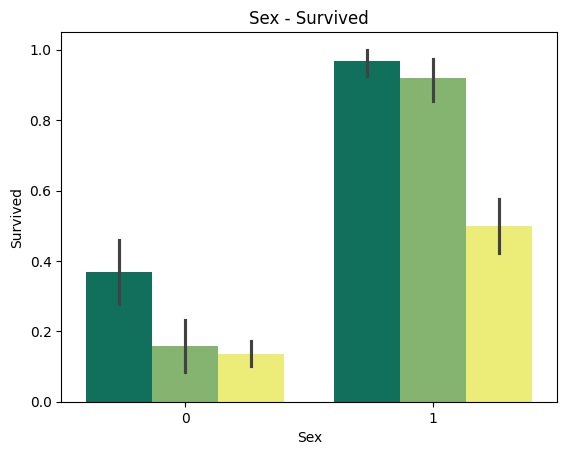

In [106]:
sns.barplot(x='Sex',y='Survived',data=Data,palette='summer', legend=False, hue='Pclass')
plt.title('Sex - Survived')
plt.show()

Ящик с усами. (Распределение пассажиров по полу и возрасту)

C:\Users\Naeim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


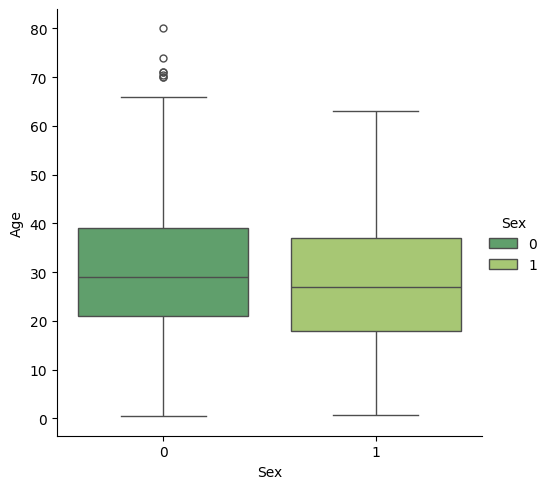

In [113]:
sns.catplot(x="Sex",y="Age",data=Data,kind="box",palette='summer',hue="Sex")
plt.show()

C:\Users\Naeim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


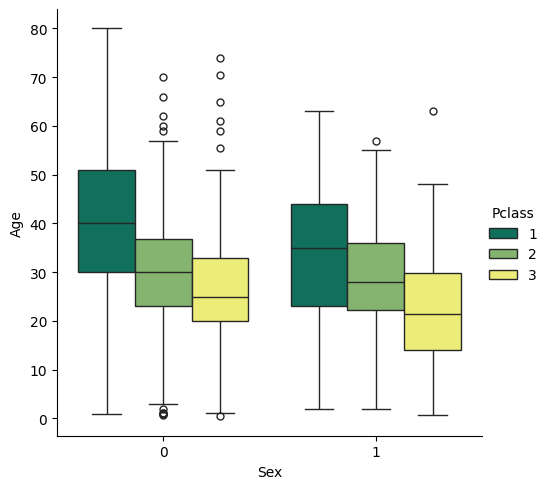

In [114]:
sns.catplot(x="Sex",y="Age",hue="Pclass",data=Data,kind="box",palette='summer')
plt.show()

In [115]:
Data['Embarked'].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [116]:
Data.dropna(subset=['Embarked'],inplace=True)

In [117]:
Data = pd.get_dummies(Data,columns=['Embarked'],drop_first=True)


In [118]:
Data.Age.isna().value_counts()

Age
False    712
True     177
Name: count, dtype: int64

In [121]:
median_age = Data['Age'].median()
Data['Age'].fillna(median_age,inplace=True)

C:\Users\Naeim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


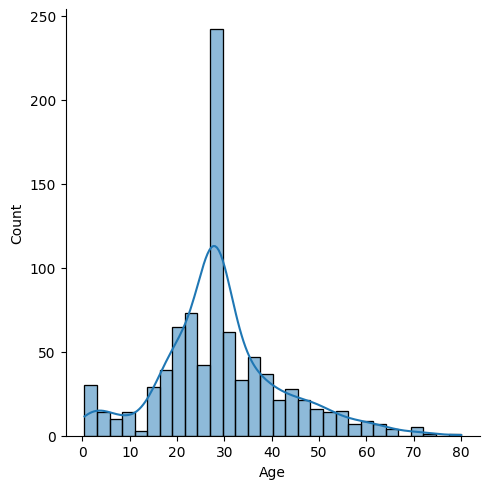

In [123]:
sns.displot(Data['Age'],kde=True)

In [124]:
Data.Fare.isna().value_counts()

Fare
False    889
Name: count, dtype: int64

In [125]:
Data.Pclass.isna().value_counts()

Pclass
False    889
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='Survived'>

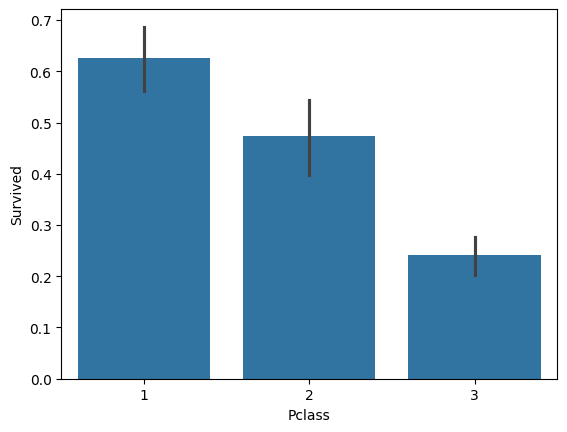

In [126]:
sns.barplot(x="Pclass",y="Survived",data=Data)

In [138]:
Data.drop('PassengerId', axis=1, inplace=True)

NumericData = Data._get_numeric_data()
NumericData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize,isAlone
0,0,3,0,22.0,1,0,7.2500,False,True,2,0
1,1,1,1,38.0,1,0,71.2833,False,False,2,0
2,1,3,1,26.0,0,0,7.9250,False,True,1,1
3,1,1,1,35.0,1,0,53.1000,False,True,2,0
4,0,3,0,35.0,0,0,8.0500,False,True,1,1


In [139]:
NumericData.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize,isAlone
Survived,1.000000,-0.335549,0.541585,-0.069822,-0.034040,0.083151,0.255290,0.004536,-0.151777,0.018277,-0.206207
Pclass,-0.335549,1.000000,-0.127741,-0.336512,0.081656,0.016824,-0.548193,0.220558,0.076466,0.064221,0.138553
Sex,0.541585,-0.127741,1.000000,-0.086506,0.116348,0.247508,0.179958,0.075217,-0.121405,0.203191,-0.306985
Age,-0.069822,-0.336512,-0.086506,1.000000,-0.232543,-0.171485,0.093707,-0.030436,-0.008964,-0.244631,0.169518
SibSp,-0.034040,0.081656,0.116348,-0.232543,1.000000,0.414542,0.160887,-0.026692,0.069438,0.890654,-0.584186
Parch,0.083151,0.016824,0.247508,-0.171485,0.414542,1.000000,0.217532,-0.081585,0.061512,0.782988,-0.583112
Fare,0.255290,-0.548193,0.179958,0.093707,0.160887,0.217532,1.000000,-0.116684,-0.163758,0.218658,-0.274079
Embarked_Q,0.004536,0.220558,0.075217,-0.030436,-0.026692,-0.081585,-0.116684,1.000000,-0.499261,-0.059007,0.087099
Embarked_S,-0.151777,0.076466,-0.121405,-0.008964,0.069438,0.061512,-0.163758,-0.499261,1.000000,0.078197,0.027982
FamilySize,0.018277,0.064221,0.203191,-0.244631,0.890654,0.782988,0.218658,-0.059007,0.078197,1.000000,-0.690654


<Axes: >

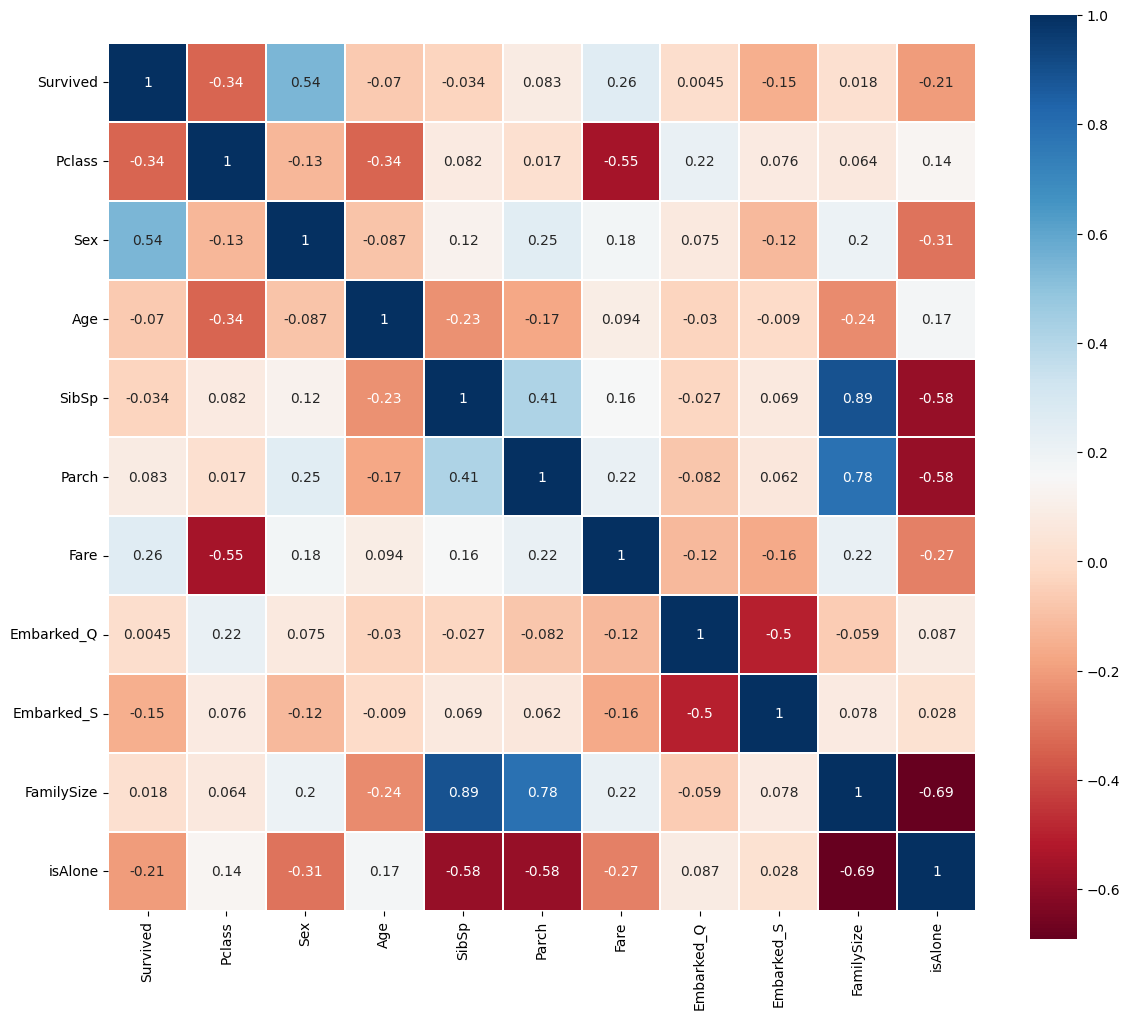

In [140]:
plt.figure(figsize=(14,12))
sns.heatmap(NumericData.corr(),linewidths=0.1,vmax=1.0,
            square=True,cmap=plt.cm.RdBu,linecolor='white',annot=True)

In [141]:
Data['FamilySize'] = Data.Parch +Data.SibSp +1

In [142]:
Data['isAlone'] = (Data.FamilySize==1).astype(int)

<Axes: >

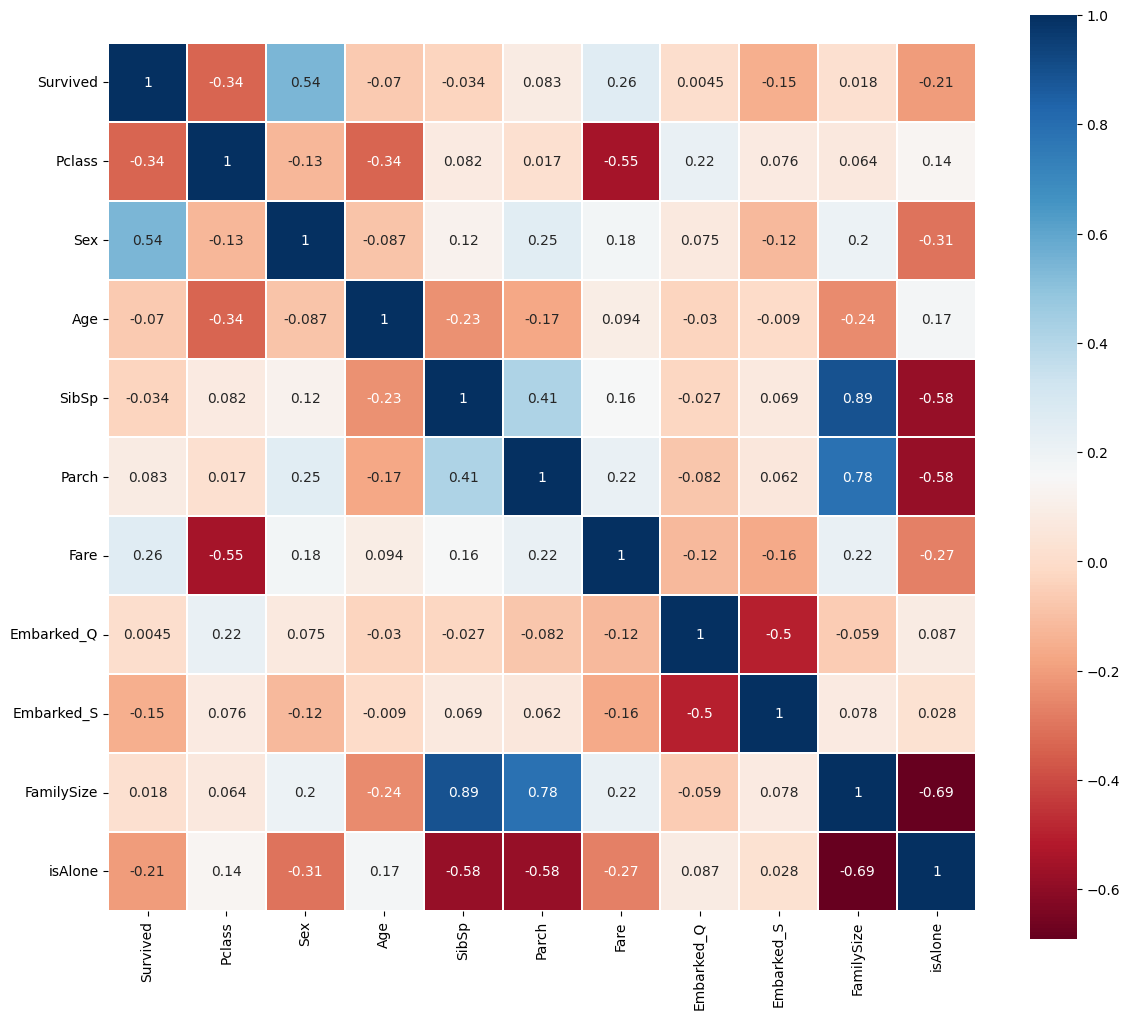

In [143]:
NumericData = Data._get_numeric_data()

plt.figure(figsize=(14,12))
sns.heatmap(NumericData.corr(),linewidths=0.1,vmax=1.0,
            square=True,cmap=plt.cm.RdBu,linecolor='white',annot=True)

In [144]:
data = pd.read_csv("data2.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [145]:
data.shape


(1460, 81)

In [146]:
data.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [147]:
data = data.drop(columns=["Id"])

y = data["SalePrice"]
X = data.drop(columns=["SalePrice"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

C:\Users\Naeim\AppData\Local\Temp\ipykernel_34152\2854457753.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train)


<Axes: xlabel='SalePrice', ylabel='Density'>

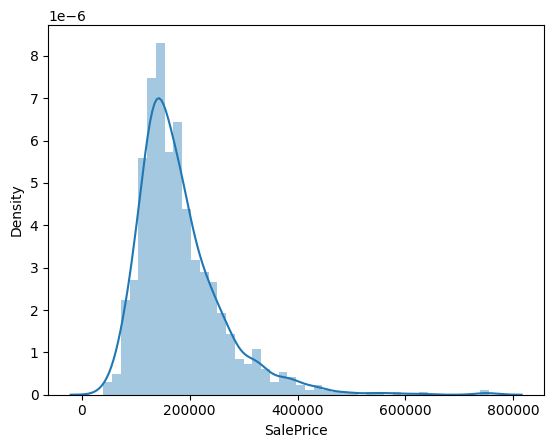

In [148]:
sns.distplot(y_train)


Так как для решения нашей задачи мы бы хотели обучить линейную регрессию, было бы хорошо найти признаки, "наиболее линейно" связанные с целевой переменной, иначе говоря, посмотреть на коэффициент корреляции Пирсона между признаками и целевой переменной.

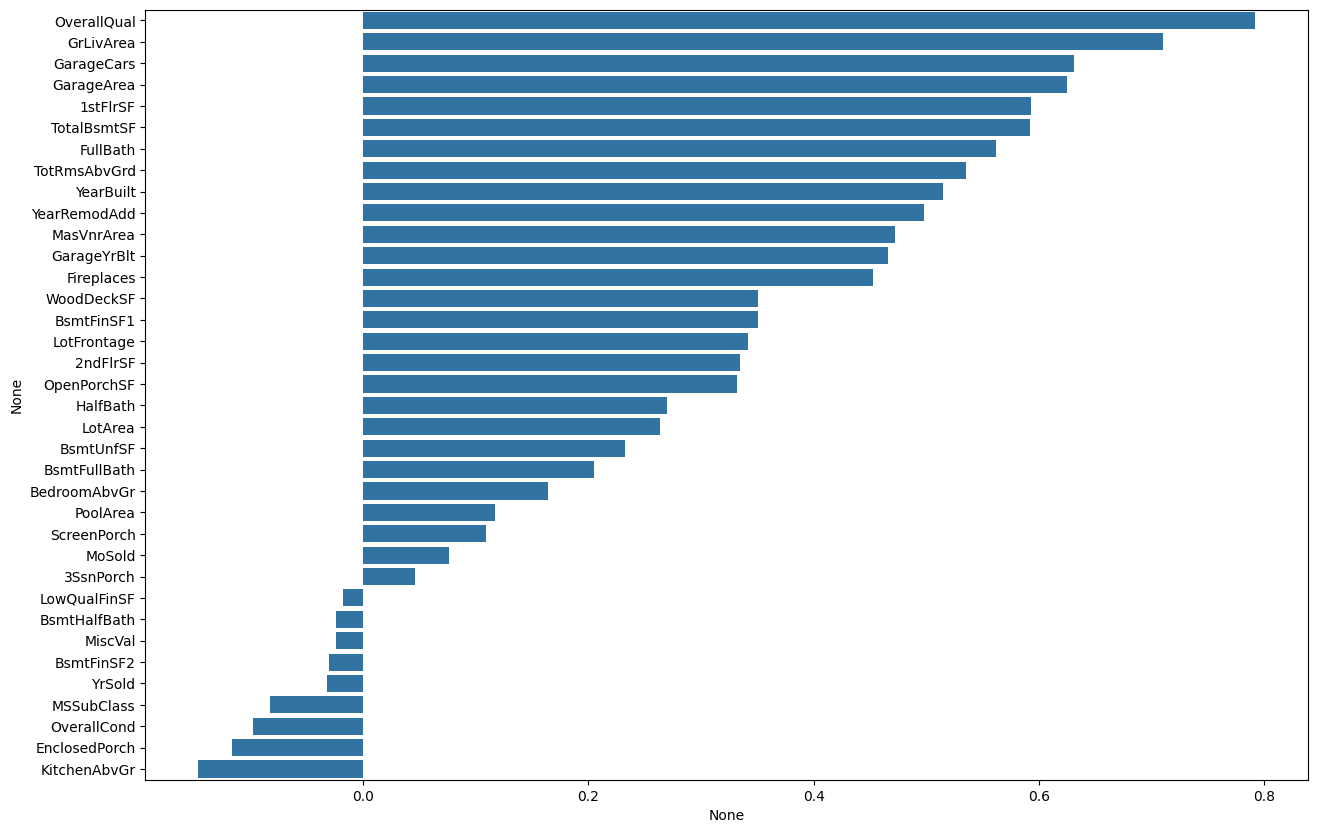

In [149]:
numeric_data = X_train.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

X_train = X_train.fillna(numeric_data_mean)
X_test = X_test.fillna(numeric_data_mean)

correlations = X_train[numeric_features].corrwith(y_train).sort_values(ascending=False)


plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

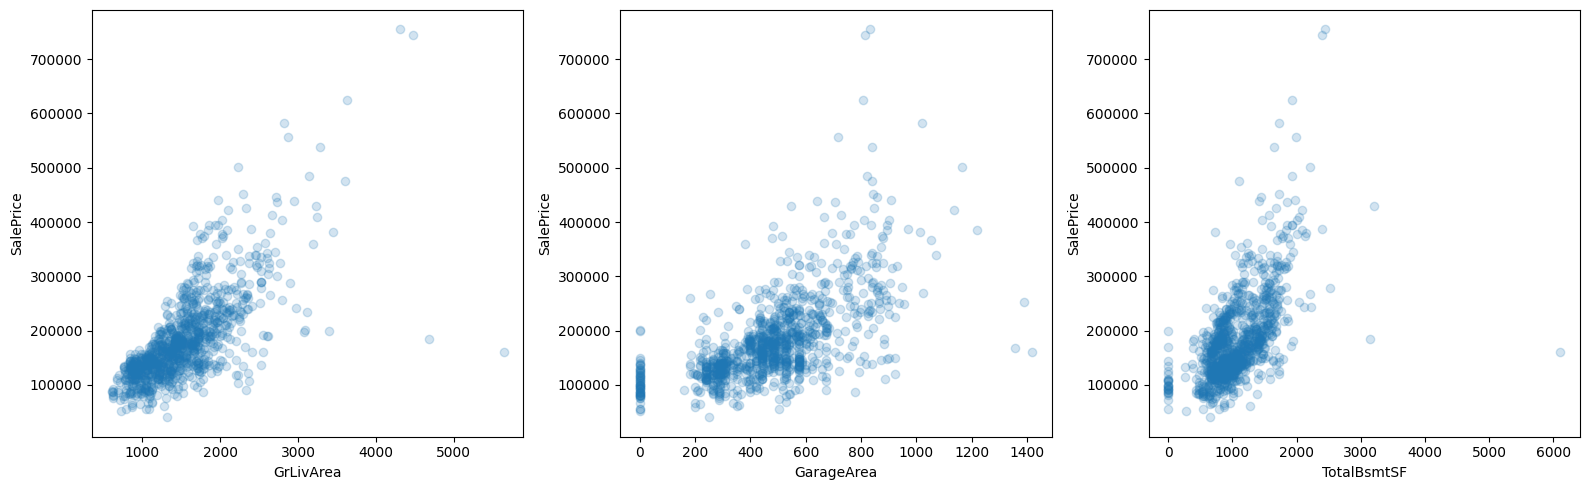

In [150]:
fig, axs = plt.subplots(figsize=(16, 5), ncols=3)
for i, feature in enumerate(["GrLivArea", "GarageArea", "TotalBsmtSF"]):
    axs[i].scatter(X_train[feature], y_train, alpha=0.2)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("SalePrice")
plt.tight_layout()

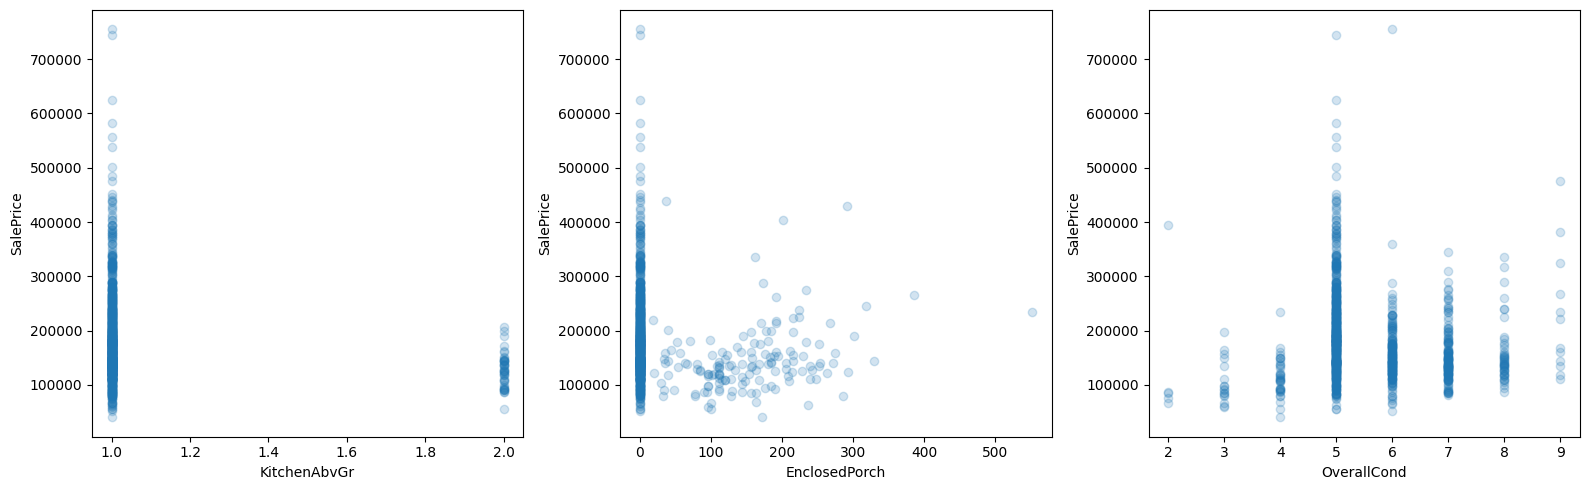

In [152]:
fig, axs = plt.subplots(figsize=(16, 5), ncols=3)
for i, feature in enumerate(["KitchenAbvGr",'EnclosedPorch','OverallCond']):
    axs[i].scatter(X_train[feature], y_train, alpha=0.2)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("SalePrice")
plt.tight_layout()

In [153]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model = Ridge()
model.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
y_train_pred = model.predict(X_train[numeric_features])

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 32085.7681
Train RMSE = 35631.3131


In [155]:
from sklearn.metrics import make_scorer

def rmse(y_true, y_pred):
    error = (y_true - y_pred) ** 2
    return np.sqrt(np.mean(error))

rmse_scorer = make_scorer(
    rmse,
    greater_is_better=False
)

In [158]:
def show_weights(features, weights, means, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=3)
    sorted_weights = sorted(zip(weights, features, means, scales), reverse=True)
    weights, features, means, scales = zip(*sorted_weights)
    features = list(features)
    
    sns.barplot(y=features, x=list(weights), ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=list(means), ax=axs[1])
    axs[1].set_xlabel("Mean")
    sns.barplot(y=features, x=list(scales), ax=axs[2])
    axs[2].set_xlabel("Scale")
    plt.tight_layout()

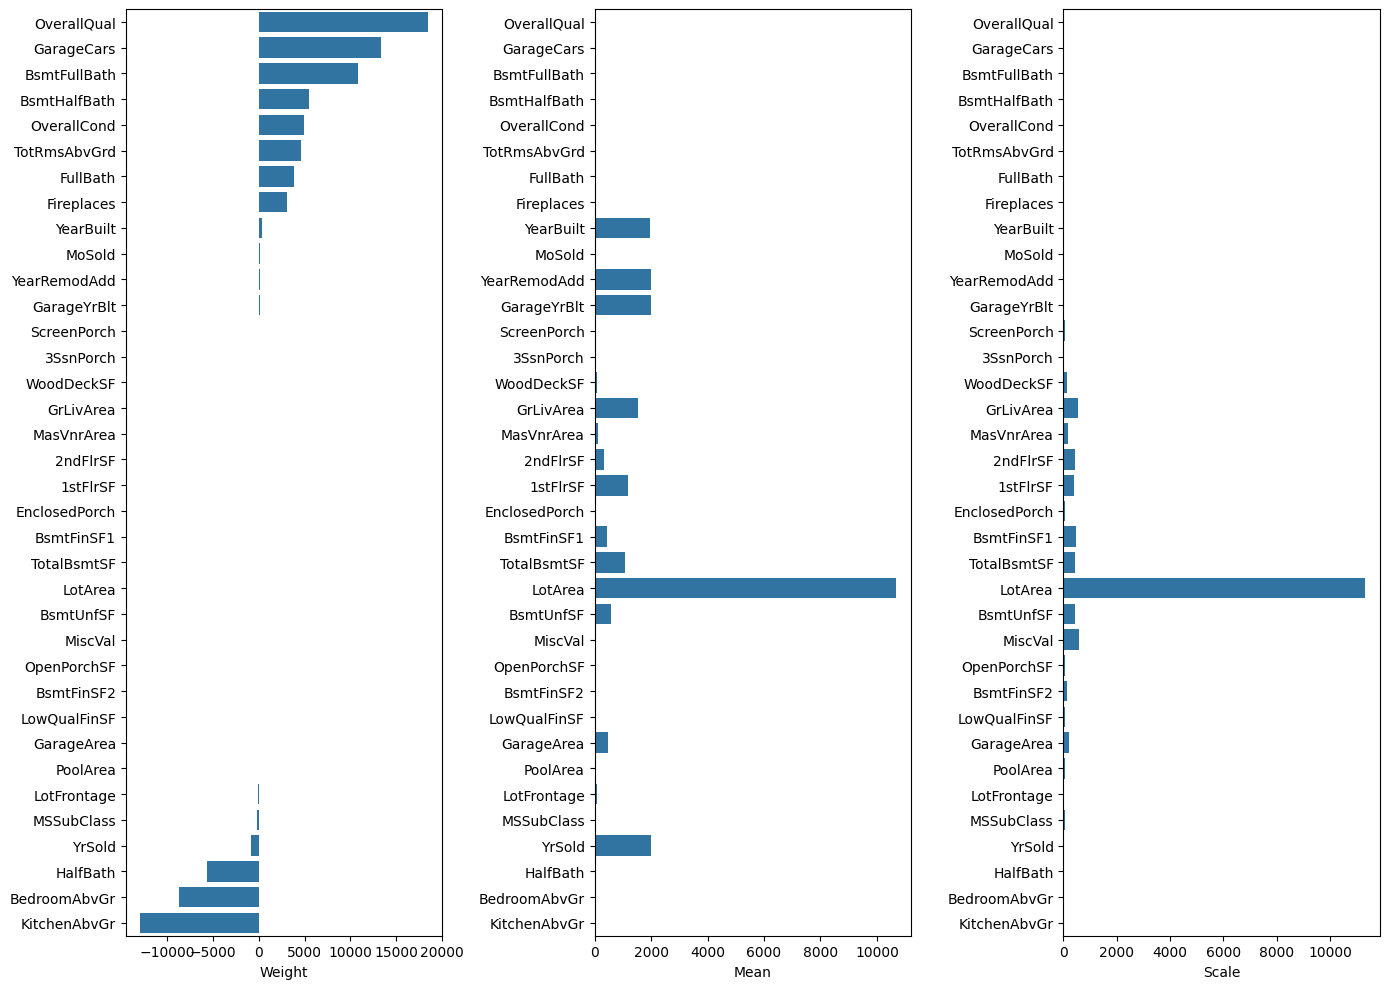

In [159]:
show_weights(numeric_features, model.coef_, X_train[numeric_features].mean(), X_train[numeric_features].std())


In [160]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

model = Ridge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 32085.3150
Train RMSE = 35631.2160


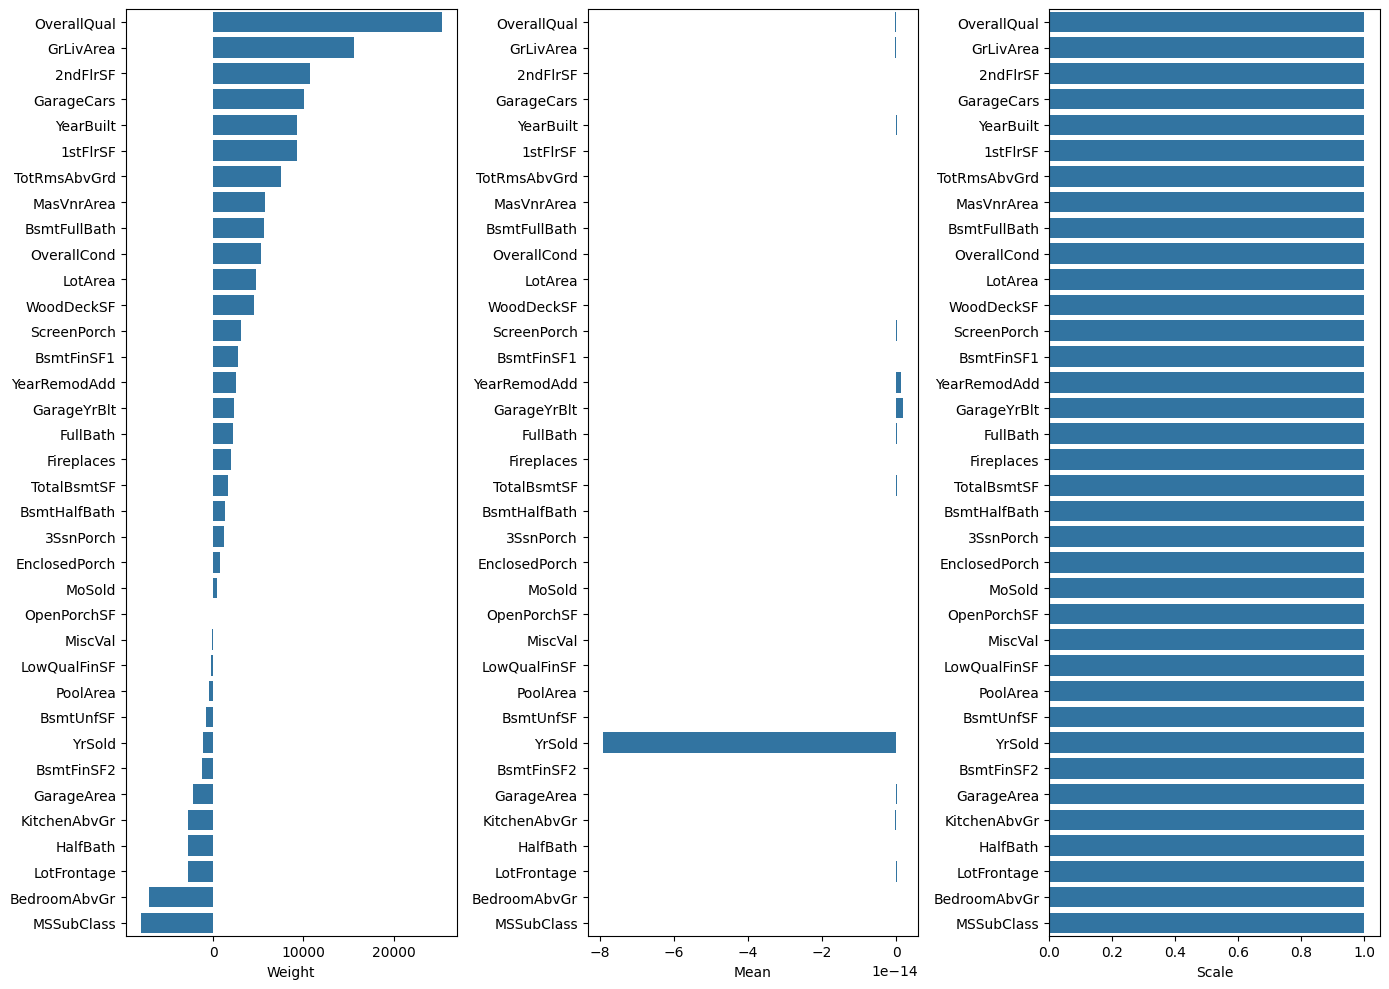

In [161]:
means = pd.Series(data=X_train_scaled.mean(axis=0), index=numeric_features)
scales = pd.Series(data=X_train_scaled.std(axis=0), index=numeric_features)
show_weights(numeric_features, model.coef_, means, scales)

Best alpha = 297.6351


Text(0, 0.5, 'CV score')

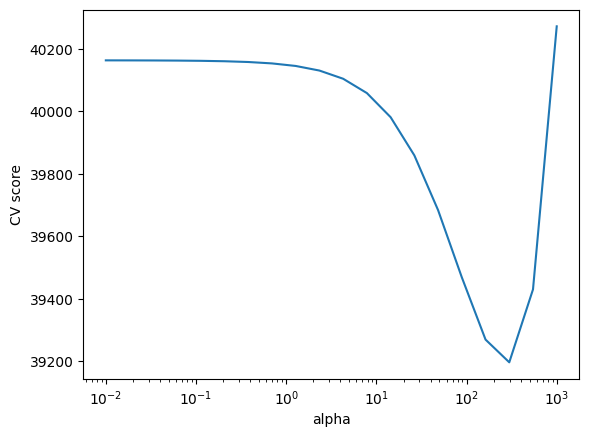

In [162]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [163]:
from sklearn.pipeline import Pipeline

simple_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', Ridge(best_alpha))
])

model = simple_pipeline.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 31703.3590


In [164]:
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
categorical

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [165]:
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")

In [166]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 26071.4811


In [167]:
print("Size before OneHot:", X_train.shape)
print("Size after OneHot:", column_transformer.transform(X_train).shape)

Size before OneHot: (1022, 79)
Size after OneHot: (1022, 293)


In [168]:

from sklearn.linear_model import Lasso

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

RMSE = 26446.6016


C:\Users\Naeim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1165605883.192627, tolerance: 663740509.6745819
  model = cd_fast.sparse_enet_coordinate_descent(


In [169]:
ridge_zeros = np.sum(pipeline.steps[-1][-1].coef_ == 0)
lasso_zeros = np.sum(lasso_pipeline.steps[-1][-1].coef_ == 0)
print("Zero weights in Ridge:", ridge_zeros)
print("Zero weights in Lasso:", lasso_zeros)

Zero weights in Ridge: 0
Zero weights in Lasso: 31


Best alpha = 263.6651


Text(0, 0.5, 'CV score')

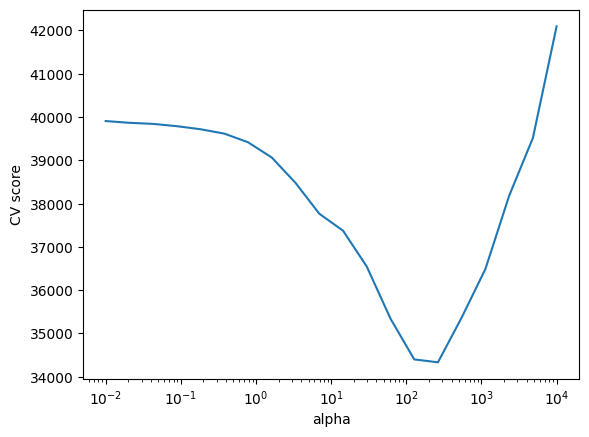

In [170]:
alphas = np.logspace(-2, 4, 20)
searcher = GridSearchCV(lasso_pipeline, [{"regression__alpha": alphas}],
                        scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
searcher.fit(X_train, y_train)

best_alpha = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [171]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 25645.3918
